# Desafio - Semana 3

#### Objetivo: realizar análise na pontuação de crédito dos consumidores.
#### Valores de análise: média, mediana, moda e desvio padrão da pontuação de crédito.

## Parte 1: Apresentação dos Dados

In [52]:
# importação da biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [4]:
# leitura dos dados
df = pd.read_csv('desafio1.csv')

In [17]:
# visualizando os 5 primeiros casos
df.head(5)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [6]:
# visualizando os tipos de dados
df.dtypes

RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

In [7]:
# identificando possíveis NA (quantidade de NA)
df.isna().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [8]:
# análise prévia dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


## Parte 2: análise univariada

In [9]:
# variável de interesse: pontuação de crédito ("pontuacao_credito")

0       619
1       608
2       502
3       699
4       850
       ... 
6995    633
6996    623
6997    611
6998    666
6999    521
Name: pontuacao_credito, Length: 7000, dtype: int64

In [15]:
# calculando a média geral
df['pontuacao_credito'].mean()

649.787

In [11]:
# calculando a mediana geral
df['pontuacao_credito'].median()

651.0

In [12]:
# calculando a moda geral
df['pontuacao_credito'].mode()

0    850
dtype: int64

In [14]:
# calculando o desvio padrão geral
df['pontuacao_credito'].std()

97.0462786489001

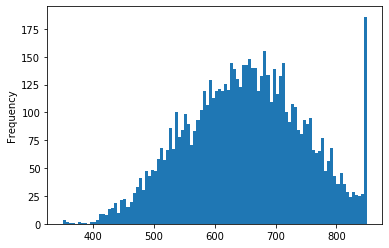

In [18]:
# gráfico frequência (histograma)
df['pontuacao_credito'].plot(kind = 'hist', bins= 100)

## Parte 3: Análise Multivariada

In [51]:
# visualizando quantidade de estados
df['estado_residencia'].nunique()

3

In [36]:
# agrupando os valores por região
df.groupby('estado_residencia')['pontuacao_credito'].sum()

estado_residencia
PR    1123352
RS    1139434
SC    2285723
Name: pontuacao_credito, dtype: int64

In [53]:
# calculando moda, média, mediana, desvio padrão da pontuação de crédito por região
df_credito = df.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode, np.median, np.mean,
                                                                       np.std]).rename(columns = {'mode' : 'moda',
                                                                       'median' : 'mediana',
                                                                       'mean' : 'media',
                                                                       'std' : 'desvio_padrao'}).sort_values(by='estado_residencia', ascending=False)

# método ".agg()" => permite agregar usando uma ou mais operações, depois foi renomeado as colunas para saída ser de acordo com o JSON e por último ordenado de forma crescente

In [54]:
# visualizando os dados calculados
df_credito

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
SC,850,653,649.537653,97.233493
RS,850,650,651.105143,95.136598
PR,850,650,648.961294,98.607186


In [56]:
# colocando os dados no formato final
df_final = df_credito.T
df_final.head()

estado_residencia,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


In [57]:
# exportando os dados para o formato json
df_final.to_json('submission.json', orient='columns')